In [24]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# 1. Outlier detection

- An outlier is an observation that is unlike the other observations. 
- They are rare, distinct, or do not fit in some way
- Outliers can be measurement or input error, data corruption ot true outlier observation

Identifying outliers and bad data one of the most difficult parts of data cleanup, and it takes time to get right.

**This task need to be done cautiously**.


## 1.1 Standard Deviation Method
**3x standard deviations ($\sigma$) from the mean ($\mu$)** is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution.

len= 1000 mean= 50.194062380798016 std= 4.9050206696610585
cutoff= 14.715062008983175 lower= 35.47900037181484 upper= 64.9091243897812
Identified outliers: 4
Non-outlier observations: 996


c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


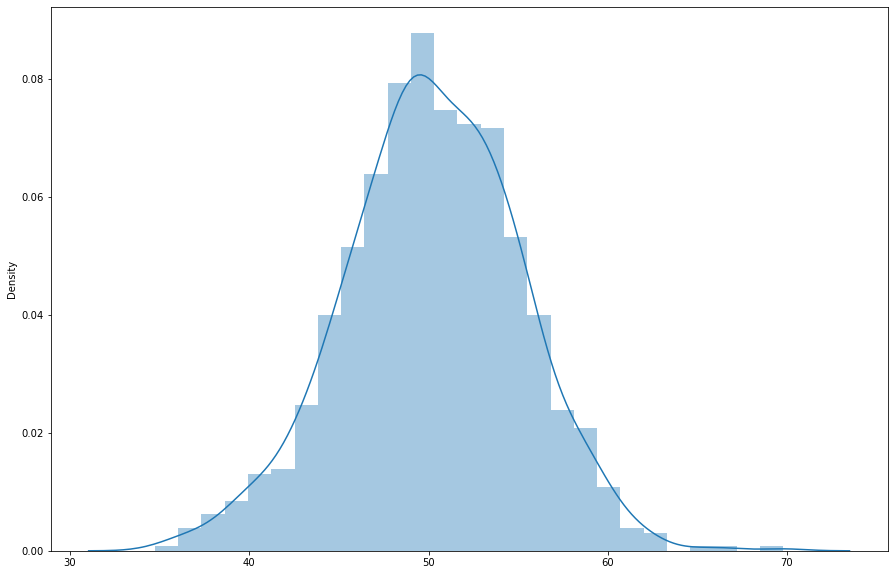

In [25]:
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean
from numpy import std
import seaborn as sns

seed(1)
data = 5 * randn(1000) + 50
sns.distplot(data)

# calculate summary statistics
data_mean, data_std = mean(data), std(data)
print('len=', len(data), 'mean=', data_mean, 'std=', data_std)

# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off 
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

## 1.2 Interquartile Range Method
Limits on the sample values that are a factor $k=1.5$ of the $IQR$ below the $25$ percentile or above $75$ percentile.

len= 1000
Percentiles: 25th=46.999, 75th=53.520, IQR=6.521
cutoff= 9.781194643044664 lower= 37.21800319685014 upper= 63.30118891163591
Identified outliers: 9
Non-outlier observations: 991


c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


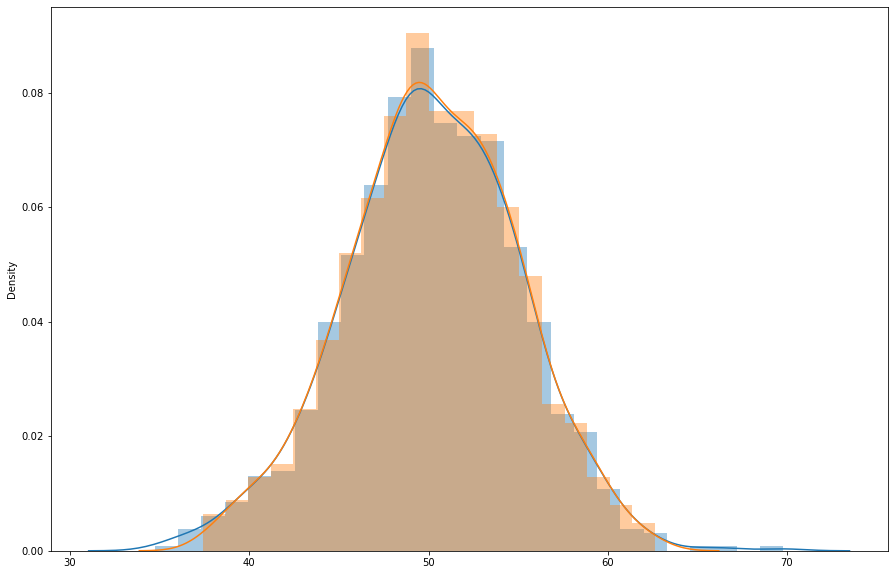

In [56]:
from numpy.random import seed
from numpy.random import randn 
from numpy import percentile

seed(1)
data = 5 * randn(1000) + 50
sns.distplot(data)
print('len=', len(data))
      
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper] 
print('Non-outlier observations: %d' % len(outliers_removed))

sns.distplot(outliers_removed)

# 2. Imputation of missing values

### Replace 0 by numpy NaN in several columns

In [27]:
import numpy as np
from pandas import read_csv

dataset = read_csv('data/pima-indians-diabetes.csv', header=None) 
print(dataset.head(20))

num_missing = (dataset[[1,2,3,4,5,6,7]] == 0).sum()
print(num_missing)

dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
print(dataset.isnull().sum())
print(dataset.head(20))
print(dataset.shape)

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1
1      5
2     35
3    227
4    374
5     11
6      0
7

## 3.1 Remove rows with empty values

In [28]:
dataset.dropna(inplace=True)
print(dataset.shape)

(392, 9)


## 3.2 Statistical Imputation

**Simple imputer**

In [29]:
# import numpy as np
# from sklearn.impute import SimpleImputer
# data = [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]]
# print(data)

# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(data)

# X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]

# print(imp_mean.transform(X))


import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]])

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))
df.dtypes

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


0    object
1    object
dtype: object

**Simple imputer with horse-colic dataset**

In [30]:
import numpy as np
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') 

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten())) 

# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
X_trans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(isnan(X_trans).flatten()))

Missing: 1605
Missing: 0


**kNN imputation**

In [31]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') 

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = KNNImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


# 3. Data Transformations
**ML models learn a mapping from input variables to an output variable**


## 3.1 Encoding

URL https://contrib.scikit-learn.org/category_encoders/

**Poznamka: Python 3.8 FutureWarning is OK for the library category_encoders**

### 3.1.1 Ordinal Encoding or Label Encoding

In [32]:
import pandas as pd
import category_encoders as ce

data = pd.DataFrame({
    'city' : ['delhi', 'hyderabad', 'delhi', 'delhi', 'gurgaon', 'hyderabad']
})

# create an object of the OrdinalEncoding
ce_ordinal = ce.OrdinalEncoder(cols=['city'])

# fit and transform and you will get the encoded data
ce_ordinal.fit_transform(data)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,city
0,1
1,2
2,1
3,1
4,3
5,2


### 3.1.2 One Hot Encoding

In [33]:
import pandas as pd
import category_encoders as ce

data = pd.DataFrame({
    'gender' : ['M', 'F', 'M', 'F', 'F']
})

# create an object of the OneHotEncoder
ce_OHE = ce.OneHotEncoder(cols=['gender'])

# fit and transform and you will get the encoded data
ce_OHE.fit_transform(data)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender_1,gender_2
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


### 3.1.3 Binary Encoding

In [34]:
import pandas as pd
import category_encoders as ce

# make some data
data = pd.DataFrame({
    'class' : ['a', 'b', 'a', 'b', 'd', 'e', 'd', 'f', 'g', 'h', 'h', 'k', 'h', 'i', 's', 'p', 'z']})

# create object of BinaryEncoder
ce_binary = ce.BinaryEncoder(cols = ['class'])

# fit and transform and you will get the encoded data
ce_binary.fit_transform(data)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,class_0,class_1,class_2,class_3,class_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,1
5,0,0,1,0,0
6,0,0,0,1,1
7,0,0,1,0,1
8,0,0,1,1,0
9,0,0,1,1,1


### 3.1.4 BaseN Encoding

In [35]:
import pandas as pd
import category_encoders as ce

# make some data
data = pd.DataFrame({
    'class' : ['a', 'b', 'a', 'b', 'd', 'e', 'd', 'f', 'g', 'h', 'h', 'k', 'h', 'i', 's', 'p', 'z']})

# create an object of the BaseNEncoder
ce_baseN4 = ce.BaseNEncoder(cols=['class'], base=4)

# fit and transform and you will get the encoded data
ce_baseN4.fit_transform(data)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,class_0,class_1,class_2
0,0,0,1
1,0,0,2
2,0,0,1
3,0,0,2
4,0,0,3
5,0,1,0
6,0,0,3
7,0,1,1
8,0,1,2
9,0,1,3


### 3.1.5 Hashing (md5)

In [36]:
import pandas as pd
import category_encoders as ce

data = pd.DataFrame({
    'color' : ['Yellow', 'Black', 'Green', 'Blue', 'Blue', 'Green', 'Black', 'Blue']
})

# create an object of the HashingEncoder
ce_HE = ce.HashingEncoder(cols=['color'],n_components=5)

# fit and transform and you will get the encoded data
ce_HE.fit_transform(data)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,col_0,col_1,col_2,col_3,col_4
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,0,1
6,0,0,0,1,0
7,0,0,0,1,0


### 3.1.6 Target Encoding

In [37]:
import pandas as pd
import category_encoders as ce

data = pd.DataFrame({
    'color' : ['Blue', 'Black', 'Black','Blue', 'Blue'],
    'outcome' : [1,      2,        1,     1,      2,]
})

# column to perform encoding
X = data['color']
Y = data['outcome']

# create an object of the TargetEncoder
ce_TE = ce.TargetEncoder(cols=['color'])

# fit and transform and you will get the encoded data
ce_TE.fit_transform(X,Y)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,color
0,1.341280
1,1.473106
2,1.473106
3,1.341280
4,1.341280


### 3.1.7 Leave One Out

In [38]:
import pandas as pd
import category_encoders as ce

data = pd.DataFrame({
    'color' : ['Blue', 'Black', 'Black','Blue', 'Blue'],
    'outcome' : [2,      1,        1,     1,      2]
})

# column to perform encoding
X = data['color']
Y = data['outcome']

# create an object of the TargetEncoder
ce_TE = ce.LeaveOneOutEncoder(cols=['color'])

# fit and transform and you will get the encoded data
ce_TE.fit_transform(X,Y)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,color
0,1.5
1,1.0
2,1.0
3,2.0
4,1.5


## 3.2 Data scaling

- The scale and distribution of the data drawn from the domain may be different for each variable
- This can lead to unstable or poor performance of models
- This can lead to increasing sensitivity to inputs
- This can lead to higher generalization error


**3.2.1 Data Normalization**

## $x_{normalization}=\frac{x-x_{min}}{x_{max} - x_{min}}$

URL https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [39]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler 

# define data
data = asarray([[100, 0.001],
[8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
print(data)

# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(data) 
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


**3.2.2 Data Standardization**
## $x_{standardized} = \frac{x -\mu}{\sigma}$
where 
- $\mu$ is the mean  of $x$
- $\sigma$ is the standard deviation of $x$

URL https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [40]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler 

# define data
data = asarray([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
print(data)

# define standard scaler
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(data) 
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


**3.2.3 Robust Scaling**

Robust scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

## $x_{robust} = \frac{x - median}{p_{75} - p_{25}}$

where 
- $median$ is the median of $x$
- $p_{25}$ and $p_{75}$ are 25th and 75th interquartile range values (IQR).

URL https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [41]:
from sklearn.preprocessing import RobustScaler

# define data
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
print(X)

# define robust scaler
scaler = RobustScaler()

# transform data
scaled = RobustScaler().fit_transform(X)
print(scaled)

[[1.0, -2.0, 2.0], [-2.0, 1.0, 3.0], [4.0, 1.0, -2.0]]
[[ 0.  -2.   0. ]
 [-1.   0.   0.4]
 [ 1.   0.  -1.6]]


## 3.3 Making data distributions more Gaussian (normal)

Many ML algorithms perform better or when features are on a relatively similar to normally (Gaussian) distributed.

### 3.3.1 Power Transformer 
- Replacing the data with the log, square root, or inverse to remove skew
- Yeo-Johnson transform (default): works with positive and negative values
- Box-Cox transform: only works with strictly positive values
- λ = −1.0 is a reciprocal transform.
- λ = −0.5 is a reciprocal square root transform.  
- λ = 0.0 is a log transform.
- λ = 0.5 is a square root transform.
- λ = 1.0 is no transform.

**Random data**

(array([  1.,   2.,   1.,  12.,  16.,  15.,  37.,  54.,  60.,  91.,  73.,
         98.,  99., 110.,  82.,  87.,  53.,  39.,  35.,  14.,   9.,   7.,
          2.,   1.,   2.]),
 array([-3.22281353, -2.96134664, -2.69987974, -2.43841285, -2.17694595,
        -1.91547905, -1.65401216, -1.39254526, -1.13107837, -0.86961147,
        -0.60814457, -0.34667768, -0.08521078,  0.17625611,  0.43772301,
         0.69918991,  0.9606568 ,  1.2221237 ,  1.4835906 ,  1.74505749,
         2.00652439,  2.26799128,  2.52945818,  2.79092508,  3.05239197,
         3.31385887]),
 <a list of 25 Patch objects>)

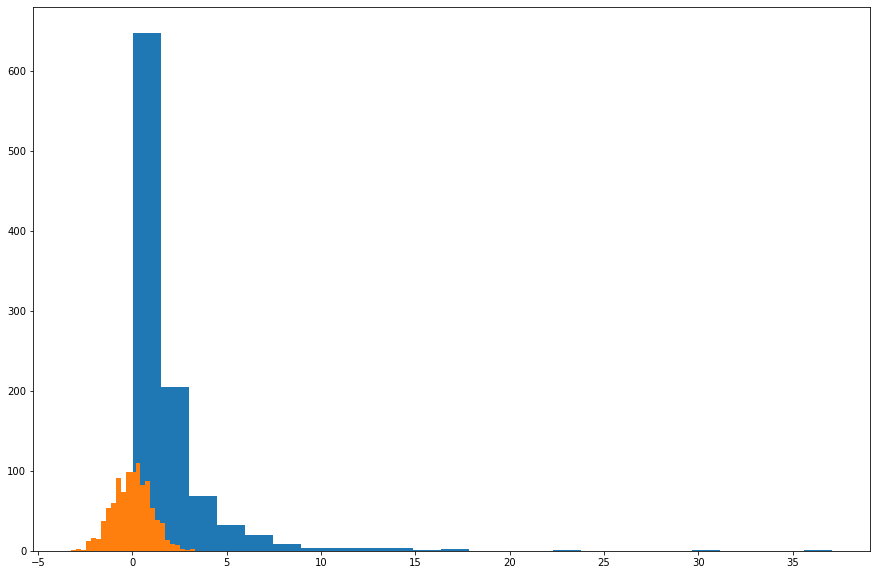

In [54]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# generate gaussian data sample
data = randn(1000)

# add a skew to the data distribution
data = exp(data)

# histogram of the raw data with a skew
pyplot.hist(data, bins=25)

# reshape data to have rows and columns
data = data.reshape((len(data),1))

# power transform the raw data
power = PowerTransformer(method='box-cox', standardize=True) 
data_trans = power.fit_transform(data)
 
# histogram of the transformed data
pyplot.hist(data_trans, bins=25) 

**Sonar data**

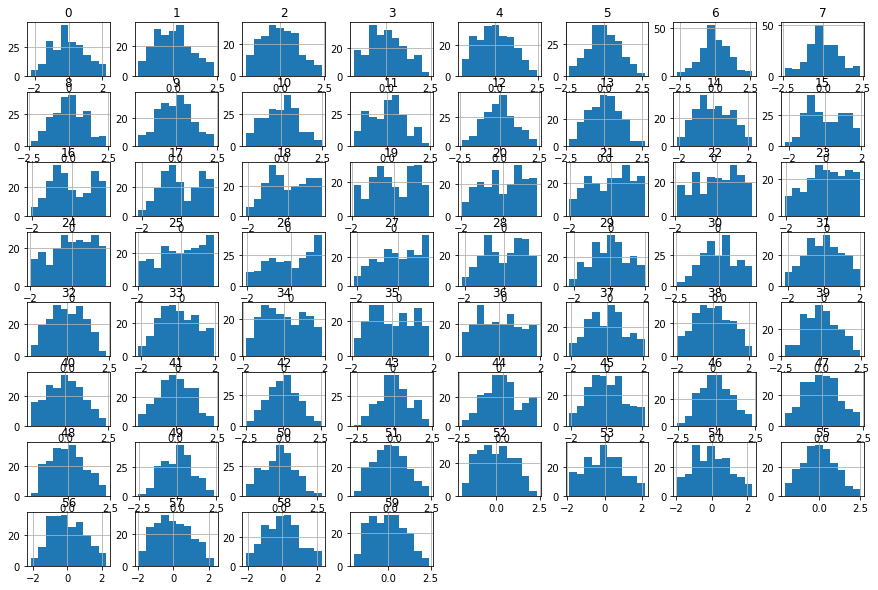

In [45]:
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer 

plt.rcParams['figure.figsize'] = [15, 10]

# Load dataset
dataset = read_csv('data/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a yeo-johnson transform of the dataset 
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist() 

### 3.3.2 Quantile Transformer

- Transform features using quantiles information.
- This method transforms the features to follow a uniform or a normal distribution. 
- Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
- It also reduces the impact of (marginal) outliers

(array([ 9., 12.,  8., 13.,  7.,  9., 14., 10., 11.,  7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

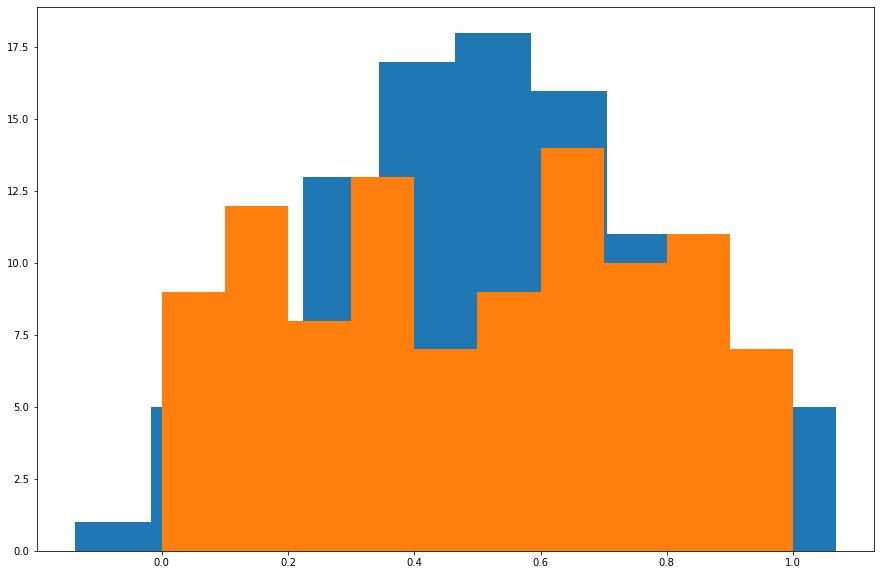

In [44]:
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(100, 1)), axis=0)
pyplot.hist(X, bins=10)

qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_t = qt.fit_transform(X)
pyplot.hist(X_t, bins=10)

# References
- [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/)
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing